In [2]:
import numpy as np

# Define a function to generate random binary input vectors with a given probability
# serve as background activity of the neurons
def generate_binary_input_vector(n, probability=0.5):
    """
    Generates a random binary input vector of length n with the specified probability.

    Args:
    n (int): Length of the binary input vector.
    probability (float): Probability of generating a 1 in the output vector (0 <= probability <= 1).

    Returns:
    numpy.ndarray: A binary input vector of length n.
    """
    binary_input = np.random.choice([0, 1], size=n, p=[1 - probability, probability])
    return binary_input

# Example usage:
n = 100  # Length of the binary input vector
probability = 0.2  # Probability of generating a 1 in the output vector
input_vector = generate_binary_input_vector(n, probability)
print("Generated Binary Input Vector:")
print(input_vector)
# print the sum of the vector
print("Sum of the vector:", np.sum(input_vector), "out of", n, "elements are 1s.")


Generated Binary Input Vector:
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]
Sum of the vector: 19 out of 100 elements are 1s.


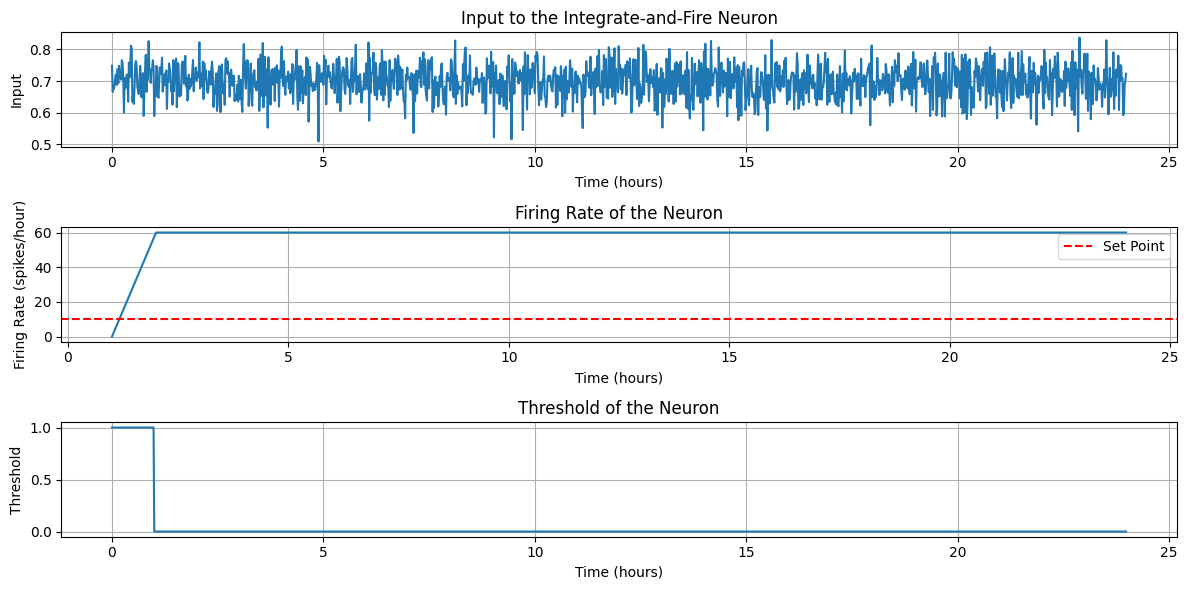

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define parameters
n = 100  # Length of the binary input vector
probability = 0.7  # Probability of generating a 1 in the input vector
simulation_duration_hours = 24
dt_minutes = 1
set_point = 10  # Set point for firing rate (spikes per hour)
threshold = 1.0

# Initialize variables
time_steps = int((simulation_duration_hours * 60) / dt_minutes)
synaptic_weights = np.random.uniform(0.01, 0.1, n)
synaptic_weights /= synaptic_weights.sum()  # Normalize weights to sum up to 1
input_history = []
firing_rate_history = []
threshold_history = []
spikes_history = []
spikes_in_hour_history = []

# Define the integrate-and-fire neuron function
def integrate_and_fire_neuron(input_vector, threshold):
    current_input = np.dot(input_vector, synaptic_weights)
    if current_input >= threshold:
        return 1
    else:
        return 0

# Simulate the neuron activity for a day
for t in range(time_steps):
    input_vector = generate_binary_input_vector(n, probability)
    spikes = integrate_and_fire_neuron(input_vector, threshold)
    spikes_history.append(spikes)
    input_history.append(np.dot(input_vector, synaptic_weights))
    threshold_history.append(threshold)

    
    # Calculate the firing rate each hour
    if (t + 1) % 60 == 0:
        spikes_in_hour = sum(spikes_history[-60:])  # Calculate spikes in the last hour
        spikes_in_hour_history.append(spikes_in_hour)
        firing_rate = spikes_in_hour / 60  # Spikes per hour
        
        
        # Adjust the threshold if the firing rate exceeds the set point
        if spikes_in_hour > set_point:
            threshold *= set_point / spikes_in_hour

        # Adjust the threshold if the firing rate is below the set point
        elif spikes_in_hour < set_point:
            threshold *= spikes_in_hour / set_point
        
        firing_rate_history.append(firing_rate) # Append the firing rate to the history

# Plot the input and firing rate over time
time = np.arange(0, simulation_duration_hours, dt_minutes / 60)
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, input_history)
plt.xlabel("Time (hours)")
plt.ylabel("Input")
plt.title("Input to the Integrate-and-Fire Neuron")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(np.arange(1, simulation_duration_hours + 1), spikes_in_hour_history)
plt.axhline(y=set_point, color='r', linestyle='--', label='Set Point')
plt.xlabel("Time (hours)")
plt.ylabel("Firing Rate (spikes/hour)")
plt.title("Firing Rate of the Neuron")
plt.legend()
plt.grid(True)

# Plot the threshold over time
plt.subplot(3, 1, 3)
plt.plot(time, threshold_history)
plt.xlabel("Time (hours)")
plt.ylabel("Threshold")
plt.title("Threshold of the Neuron")
plt.grid(True)


plt.tight_layout()
plt.show()
